# Calibration of functional forms for WP2



In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import matplotlib
matplotlib.style.use('ggplot')
#ols models
import statsmodels.formula.api as sm
from patsy import dmatrices
import re
import scipy as sp
import csv
import json
import glob
import math

In [ ]:
#testing threshold function
#combination of logistic sigmoid function and softplus function to the to the [0,1] range with parameters

In [6]:
x = np.linspace(-10.0, 10.0, num=100, endpoint=False)
y = np.array([1/(1 + math.exp(3 - math.log(1 + math.exp(x)))) for x in x])

In [10]:
x1 = np.linspace(-10.0, 10.0, num=100, endpoint=False)
y1 = np.array([1/(1 + math.exp(4 - math.log(1 + math.exp(x)))) for x in x])

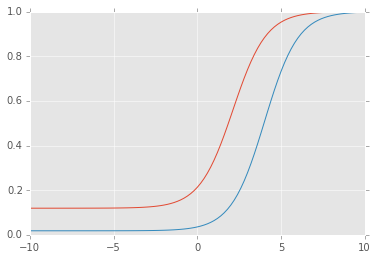

In [11]:
plt.plot(x,y, x1, y1)

In [43]:
#logistic sigmoid 
#case of exporer
mu = 1
s = 0.25
x = np.linspace(-10.0, 20.0, num=100, endpoint=False)
y = np.array([1/(1 + math.exp(-(x - mu)/s)) for x in x])

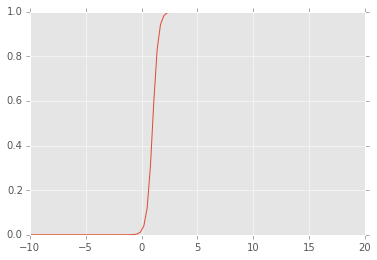

In [44]:
plt.plot(x,y)

In [45]:
def logistic_cdf(x):
    return 1/(1 + math.exp(-(x - mu)/s))

In [46]:
logistic_cdf(1)

0.5

In [47]:
logistic_cdf(2)

0.9820137900379085

In [86]:
#logistic sigmoid 
#case of exploiter
mu = 1.5
s = 0.5
x = np.linspace(-10.0, 20.0, num=100, endpoint=False)
y = np.array([1/(1 + math.exp(-(x - mu)/s)) for x in x])

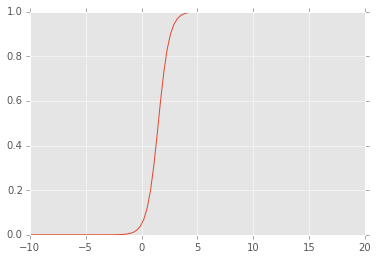

In [87]:
plt.plot(x,y)

In [88]:
logistic_cdf(1)

0.2689414213699951

In [89]:
logistic_cdf(2)

0.7310585786300049

In [65]:
#logistic sigmoid 
#case of explorer - another formulation
x = np.linspace(-10.0, 20.0, num=100, endpoint=False)
y = np.array([1/(1 + math.exp(2 - 2 * x)) for x in x])

In [154]:
#function for H threshold value
#average assumptions, need irr at different income levels
epsilon = 1
sigma = 3
x = np.linspace(0.01, 100.0, num=100, endpoint=False)
y = np.array([1/sigma * math.pow((1 + epsilon/sigma * x),-1/(epsilon + 1)) for x in x])

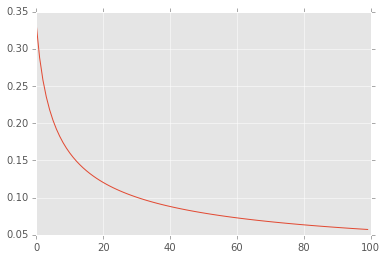

In [155]:
plt.plot(x,y)

In [156]:
def generalized_pareto(x):
    return 1/sigma * math.pow((1 + epsilon/sigma * x),-1/(epsilon + 1))

In [157]:
generalized_pareto(50)

0.07930515857181442

In [158]:
generalized_pareto(100)

0.056888012398857435

In [188]:
#logistic sigmoid 
#case of h threshold
mu = generalized_pareto(50)
s = 0.02

In [189]:
x = np.linspace(-1.0, 2.0, num=100, endpoint=False)
y = np.array([logistic_cdf(x) for x in x])

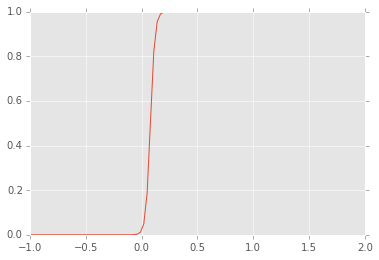

In [190]:
plt.plot(x,y)

In [191]:
logistic_cdf(0)

0.018610236238980605

In [193]:
logistic_cdf(0.08)

0.5086846443310751

In [ ]:
#parameters for reliability generation for SEMBL

In [194]:
sigma_2 = (1/(2-1))*(math.pow(1-0.2, 2)+math.pow(0.2-0.1,2))

In [195]:
sigma_2

0.6500000000000001

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/Users/wilfeli/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/Users/wilfeli/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/wilfeli/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/wilfeli/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 173, in dispatch_shell
    idents,msg = self.session.feed_identities(msg, copy=False)
  File "/Users/wilfeli/anaconda/lib/python3.5/site-packages/jupyter_client/session.py", line 781, in feed_identities
    raise ValueError("DELIM not in msg_list")
ValueError: DELIM not in msg_list
ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent 